In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# %matplotlib inline


In [2]:
# Importieren der Messdaten
cusi = pd.read_table('data_edited/cusi81119_edited.dat', header=3, dtype=np.float64)
nbsi_0 = pd.read_table('data_edited/nbsi81119_edited.dat', header=2, dtype=np.float64)
nbsi_1 = pd.read_table('data_edited/nbsi81119B_1_edited.dat', header=2, dtype=np.float64)
nbsi_2 = pd.read_table('data_edited/nbsi81119B_2_edited.dat', header=2, dtype=np.float64)
nbsi_3 = pd.read_table('data_edited/nbsi81119B_3_edited.dat', header=2, dtype=np.float64)
nbsi_4 = pd.read_table('data_edited/nbsi81119B_4_edited.dat', header=2, dtype=np.float64)
nbsi_5 = pd.read_table('data_edited/nbsi81119B_5_edited.dat', header=2, dtype=np.float64)
nbsi_6 = pd.read_table('data_edited/nbsi81119B_6_edited.dat', header=2, dtype=np.float64)
nbsi_7 = pd.read_table('data_edited/nbsi81119B_7_edited.dat', header=2, dtype=np.float64)

nbsi_jump = pd.DataFrame([nbsi_0, nbsi_1, nbsi_2, nbsi_3, nbsi_4, nbsi_5, nbsi_6, nbsi_7])
# Daten auswählen


Text(0, 0.5, 'R [$\\Omega$]')

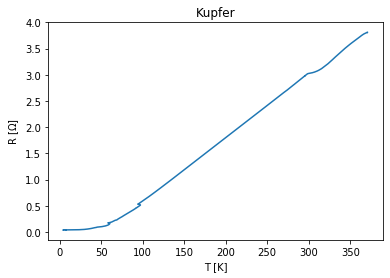

In [3]:
plt.plot(cusi['Temperatur'], cusi['R_Probe_1'])
plt.title('Kupfer')
plt.xlabel('T [K]')
plt.ylabel('R [$\Omega$]')

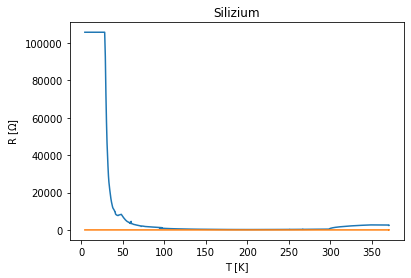

In [4]:
plt.plot(cusi['Temperatur'], cusi['R_Probe_2'])
plt.title('Silizium')
plt.xlabel('T [K]')
plt.ylabel('R [$\Omega$]')
l = 5e-3
A = 9e-3 * 0.5e-3
rho = l/(A*cusi['R_Probe_2'])
lnrho = np.log(rho)
plt.plot(cusi['Temperatur'], lnrho)

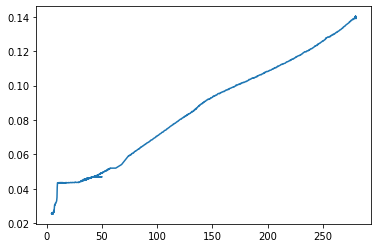

In [5]:
plt.plot(nbsi_0['Temperatur'], nbsi_0['R_Probe_1'])

In [6]:

jump = []

jump.append(np.asarray([(nbsi_0['Temperatur']), (nbsi_0['R_Probe_1'])]))
jump.append(np.asarray([(nbsi_1['Temperatur']), (nbsi_1['R_Probe_1'])]))
jump.append(np.asarray([(nbsi_2['Temperatur']), (nbsi_2['R_Probe_1'])]))
jump.append(np.asarray([(nbsi_3['Temperatur']), (nbsi_3['R_Probe_1'])]))
jump.append(np.asarray([(nbsi_4['Temperatur']), (nbsi_4['R_Probe_1'])]))
jump.append(np.asarray([(nbsi_5['Temperatur']), (nbsi_5['R_Probe_1'])]))
jump.append(np.asarray([(nbsi_6['Temperatur']), (nbsi_6['R_Probe_1'])]))
jump.append(np.asarray([(nbsi_7['Temperatur']), (nbsi_7['R_Probe_1'])]))

# for i in range(len(jump)):
#     jump[i] = jump[i][:,jump[i][0,:].argsort()]


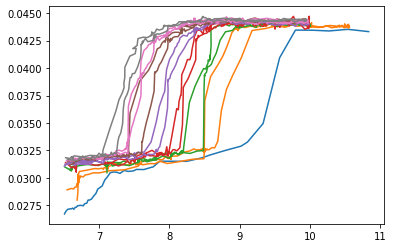

In [7]:

cut_low = np.float64(6.5)    #min. Kelvin
cut_high = np.float64(11)  #max. Kelvin

jump_trimm = []

# min_index = np.int32(0)
# max_index = np.int32(0)
#
# for i in range(len(jump)):
#     min_index = 0
#     while (jump[i][0, min_index] < cut_low) and (min_index <= jump[i][0].size-2):
#         min_index += 1
#
#     max_index = jump[i][0].size-1
#     while (jump[i][0, max_index] > cut_high):
#         max_index -= 1
#
#     jump_trimm.append( np.asarray([jump[i][0,min_index:max_index], jump[i][1,min_index:max_index]]) )

for i in range(len(jump)):
    tmp = np.ndarray((2,0))
    for j in range(jump[i][0].size):
        if jump[i][0, j] >= cut_low and jump[i][0, j] <= cut_high:
            tmp = np.append(tmp, np.array([[jump[i][0, j]], [jump[i][1, j]]]), axis=1)
    jump_trimm.append(tmp)



for i in range(len(jump_trimm)):
    plt.plot(jump_trimm[i][0], jump_trimm[i][1], '-')


In [8]:
for i in range(len(jump_trimm)):
    with open('data_edited/nbsi_'+str(i)+'_short.dat', 'w') as txt_file:
        for line in np.array2string(jump_trimm[i][0]):
            txt_file.write(' '.join(line) + "")